In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random
import scipy.stats as st
import pycountry

from scipy.stats import linregress
from sklearn import datasets, linear_model
from citipy import citipy


#Output Folder Path
path = "output_data/"

#Read_csv_Path
players_by_country_path = f"{path}player_stats_2022_country_clean.csv"
players_by_college_path = f"{path}player_stats_2022_college_clean.csv"
players_by_uscity_path = f"{path}player_stats_2022_uscity_clean.csv"
players_by_intcity_path = f"{path}player_stats_2022_intcity_clean.csv"


In [3]:
# Open CSV Reference Files
players_by_country = pd.read_csv(players_by_country_path)
players_by_college = pd.read_csv(players_by_college_path)
players_by_uscity = pd.read_csv(players_by_uscity_path)
players_by_intcity = pd.read_csv(players_by_intcity_path)

## Analysis by Country

### Country by occurrence

There are 39 countries where most players in the NBA that where not born in the US come from
The top 10  are shown here:


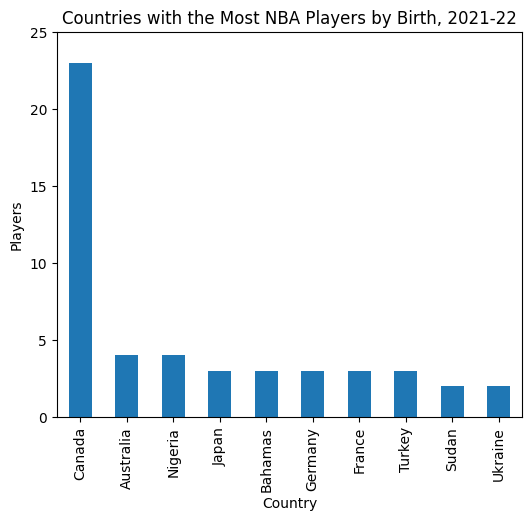

In [12]:
players_by_country_clean = players_by_country.loc[players_by_country['Country'] != 'US']

#Find the top 10 countries based on ocurrence
n = 10
countries_data = players_by_country_clean['Country'].value_counts()[:n].index.tolist()
players = players_by_country_clean['Country'].value_counts()[:n].values.tolist()

#Rename countries from 2 Letter Abbreviation to Full English Name
countries = []

for each, country in enumerate(countries_data):
    country_conv = pycountry.countries.lookup(countries_data[each])
    countries.append(country_conv.name)
    
#Dataframe creation for analysis    
countries_data = {'Country': countries ,'Players': players}

countries_df = pd.DataFrame(countries_data).reset_index(drop=True)
countries_df.set_index('Country',inplace=True, drop=True)

#Dataframe filtering plot 
players_by_country_analysis_bar = countries_df.sort_values(by='Players', ascending=False)

#Dataframe plot
fig, ax = plt.subplots(facecolor="white")
players_by_country_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", ax=ax, figsize=(6,5))

#Dataframe export to csv
countries_df.to_csv(f'{path}players_top10_2022_countries.csv', encoding='utf-8-sig')

plt.ylim(0,25)
plt.title('Countries with the Most NBA Players by Birth, 2021-22')
plt.savefig(f'{path}players_top10_2022_countries.png',bbox_inches='tight')

print(f'There are {players_by_country_clean["Country"].nunique()} countries where most players in the NBA that where not born in the US come from')
print(f'The top 10  are shown here:')
      
plt.show()

### Country by PER

Based on PER these are the top 10 countries with the peak performance players


C:\Users\parkm\AppData\Local\Temp\ipykernel_30668\233053399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_by_country_PER['Country'] = countries


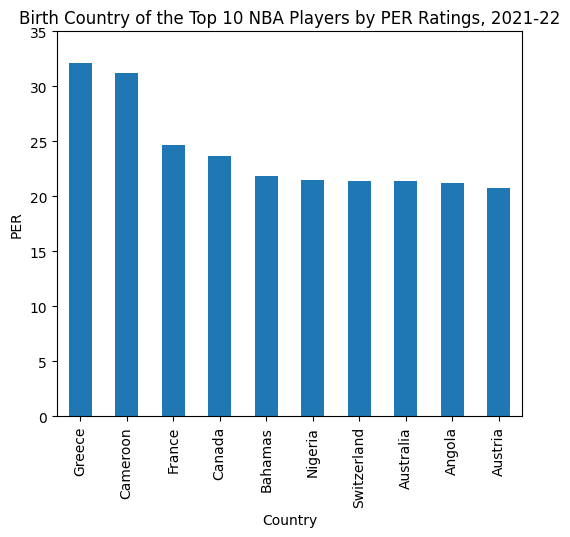

In [14]:
players_by_country_PER = players_by_country.loc[players_by_country['Country'] != 'US']

#Rename countries from 2 Letter Abbreviation to Full English Name
countries = []


for each, country in enumerate(players_by_country_PER['Country']):
    country_abb = players_by_country_PER['Country'].values[each]
    country_conv = pycountry.countries.lookup(country_abb)
    countries.append(country_conv.name)

players_by_country_PER['Country'] = countries

#Dataframe sorting starting on best PER     
players_by_country_PER_filter = players_by_country_PER[['Country','PER']].groupby('Country').max().sort_values(by="PER", ascending = False)

#Dataframe cleaning all Nan on PER and selecting top 10
players_by_country_PER_clean = players_by_country_PER_filter.dropna(subset=['PER']).head(10)

#Dataframe plot
players_by_country_PER_clean.plot(kind="bar", legend=False, ylabel="PER", figsize=(6,5))

plt.ylim(0,35)
plt.title('Birth Country of the Top 10 NBA Players by PER Ratings, 2021-22')
plt.savefig(f'{path}players_top10_2022_countries_by_PER.png',bbox_inches='tight')
print (f'Based on PER these are the top 10 countries with the peak performance players')

plt.show()

## Analysis by College

### College by occurrence

There are 173 College/University where most NBA Players come from
The top 10  are shown here:


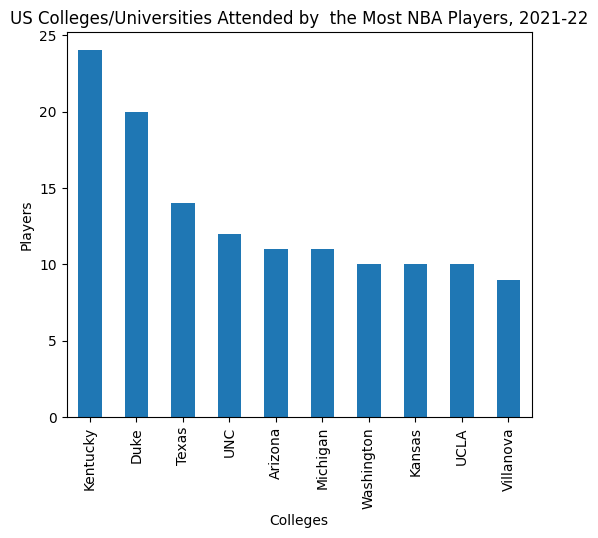

In [15]:
#Find the top 10 colleges based on ocurrence
n = 10
colleges = players_by_college['Colleges'].value_counts()[:n].index.tolist()
players = players_by_college['Colleges'].value_counts()[:n].values.tolist()

#Dataframe creation for analysis
college_data = {'Colleges': colleges ,'Players': players}

colleges_df = pd.DataFrame(college_data).reset_index(drop=True)
colleges_df.set_index('Colleges',inplace=True, drop=True)

#Dataframe filtering plot
players_by_college_analysis_bar = colleges_df

#Dataframe plot
players_by_college_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(6,5))

plt.title('US Colleges/Universities Attended by  the Most NBA Players, 2021-22')
plt.savefig(f'{path}players_top10_2022_colleges.png',bbox_inches='tight')
print(f'There are {players_by_college["Colleges"].nunique()} College/University where most NBA Players come from')
print(f'The top 10  are shown here:')

plt.show()

In [6]:
### College by PER

Based on PER these are the top 10 colleges with the peak performance players


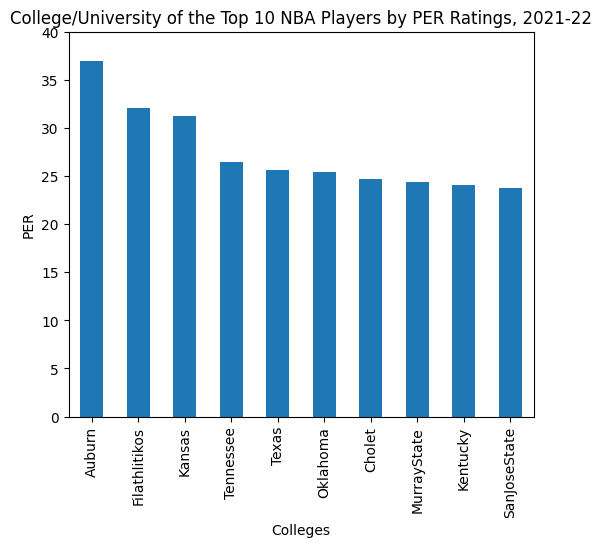

In [16]:
players_by_college_PER = players_by_college.copy()

#Dataframe sorting starting on best PER 
players_by_college_PER_filter = players_by_college_PER[['Colleges','PER']].groupby('Colleges').max().sort_values(by="PER", ascending = False)

#Dataframe cleaning all Nan on PER and selecting top 10
players_by_college_PER_clean = players_by_college_PER_filter.dropna(subset=['PER']).head(10)

#Dataframe plot
players_by_college_PER_clean.plot(kind="bar", legend=False, ylabel="PER", figsize=(6,5))

plt.ylim(0,40)
plt.title('College/University of the Top 10 NBA Players by PER Ratings, 2021-22')
plt.savefig(f'{path}players_top10_2022_colleges_by_PER.png',bbox_inches='tight')

print (f'Based on PER these are the top 10 colleges with the peak performance players')

plt.show()

## Analysis by US City

### US city by occurrence

There are 227 cities in the US where most NBA Players come from
The top 10  are shown here:


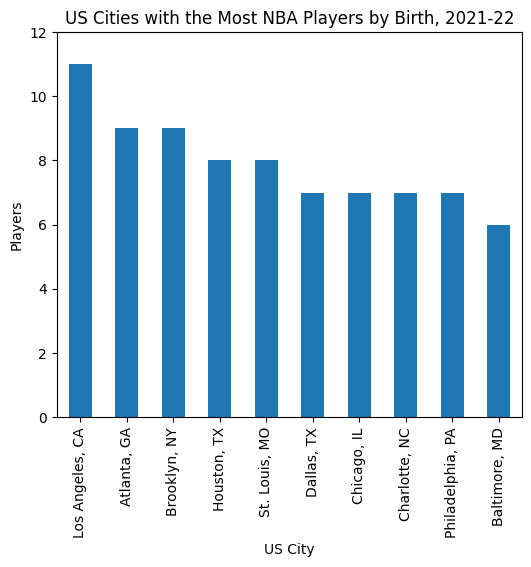

In [17]:
players_by_uscity_clean = players_by_uscity.copy()

#Find the top 10 US Cities based on ocurrence
n = 10
uscity = players_by_uscity_clean['Player US Full City'].value_counts()[:n].index.tolist()
players = players_by_uscity_clean['Player US Full City'].value_counts()[:n].values.tolist()

#Dataframe creation for analysis
uscity_data = {'US City': uscity ,'Players': players}

uscity_df = pd.DataFrame(uscity_data).reset_index(drop=True)
uscity_df.set_index('US City',inplace=True, drop=True)

#Dataframe filtering plot
players_by_uscity_analysis_bar = uscity_df

#Dataframe plot
players_by_uscity_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(6,5))

#Dataframe export to csv
uscity_df.to_csv(f'{path}players_top10_2022_uscity.csv', encoding='utf-8-sig')

plt.ylim(0,12)
plt.title('US Cities with the Most NBA Players by Birth, 2021-22')
plt.savefig(f'{path}players_top10_2022_uscity.png',bbox_inches='tight')

print(f'There are {players_by_uscity_clean["Player US Full City"].nunique()} cities in the US where most NBA Players come from')
print(f'The top 10  are shown here:')

plt.show()

### US City by PER

Based on PER these are the top 10 US cities with the peak performance players


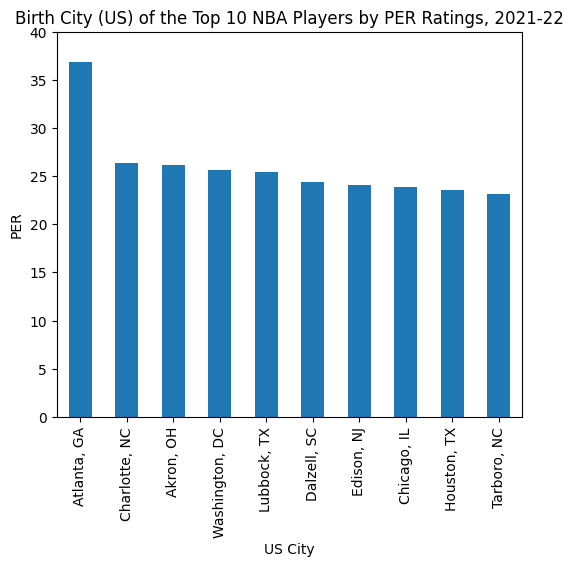

In [18]:
players_by_uscity_PER = players_by_uscity.copy()

#Dataframe sorting starting on best PER
players_by_uscity_PER_filter = players_by_uscity_PER[['Player US Full City','PER']].groupby('Player US Full City').max().sort_values(by="PER", ascending = False)

#Dataframe cleaning all Nan on PER and selecting top 10
players_by_uscity_PER_clean = players_by_uscity_PER_filter.dropna(subset=['PER']).head(10)

#Dataframe plot
players_by_uscity_PER_clean.plot(kind="bar", legend=False, ylabel="PER", xlabel="US City", figsize=(6,5))

plt.ylim(0,40)
plt.title('Birth City (US) of the Top 10 NBA Players by PER Ratings, 2021-22')
plt.savefig(f'{path}players_top10_2022_uscity_by_PER.png',bbox_inches='tight')

print (f'Based on PER these are the top 10 US cities with the peak performance players')

plt.show()

## Analysis by Int City

### Int City by occurrence

There are 69 cities where NBA player come from around the world
The top 10  are shown here:


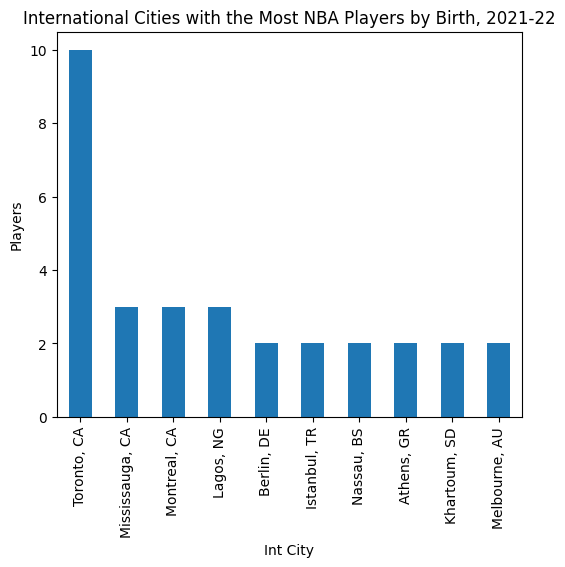

In [20]:
players_by_intcity_clean = players_by_intcity.copy()

#Find the top 10 International cities based on ocurrence
n = 10
intcity = players_by_intcity_clean['Player Int Full City'].value_counts()[:n].index.tolist()
players = players_by_intcity_clean['Player Int Full City'].value_counts()[:n].values.tolist()

#Dataframe creation for analysis
intcity_data = {'Int City': intcity ,'Players': players}

intcity_df = pd.DataFrame(intcity_data).reset_index(drop=True)
intcity_df.set_index('Int City',inplace=True, drop=True)

#Dataframe filtering plot
players_by_intcity_analysis_bar = intcity_df

#Dataframe plot
players_by_intcity_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(6,5))

#Dataframe export to csv
intcity_df.to_csv(f'{path}players_top10_2022_intcity.csv', encoding='utf-8-sig')

plt.title('International Cities with the Most NBA Players by Birth, 2021-22')
plt.savefig(f'{path}players_top10_2022_intcity.png',bbox_inches='tight')

print(f'There are {players_by_intcity_clean["Player Int Full City"].nunique()} cities where NBA player come from around the world')
print(f'The top 10  are shown here:')

plt.show()

### Int City by PER

Based on PER these are the top 10 International cities with the peak performance players


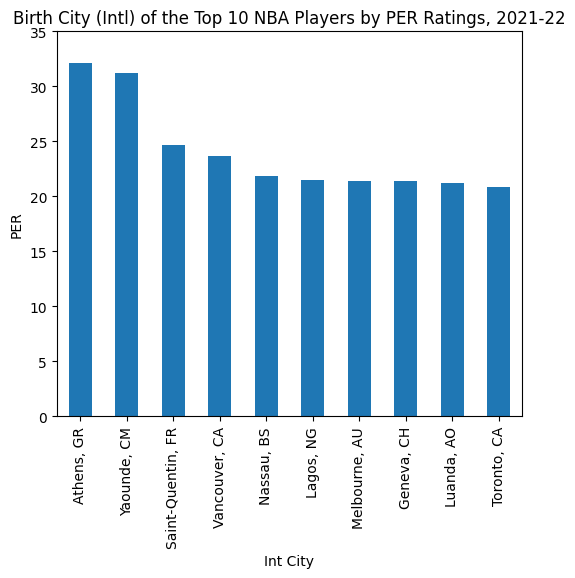

In [21]:
players_by_intcity_PER = players_by_intcity.copy()

#Dataframe sorting starting on best PER
players_by_intcity_PER_filter = players_by_intcity_PER[['Player Int Full City','PER']].groupby('Player Int Full City').max().sort_values(by="PER", ascending = False)

#Dataframe cleaning all Nan on PER and selecting top 10
players_by_intcity_PER_clean = players_by_intcity_PER_filter.dropna(subset=['PER']).head(10)

#Dataframe plot
players_by_intcity_PER_clean.plot(kind="bar", legend=False, ylabel="PER", xlabel="Int City", figsize=(6,5))

plt.ylim(0,35)
plt.title('Birth City (Intl) of the Top 10 NBA Players by PER Ratings, 2021-22')
plt.savefig(f'{path}players_top10_2022_intcity_by_PER.png',bbox_inches='tight')

print (f'Based on PER these are the top 10 International cities with the peak performance players')

plt.show()